<a href="https://colab.research.google.com/github/ngriggs/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-07-20 01:13:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-07-20 01:13:42 (339 MB/s) - ‘haberman.data’ saved [3103/3103]



In [0]:
import pandas as pd
df = pd.read_csv('haberman.data', header=None)

In [0]:
# Let's change the headers to more descriptive titles:

headers = ['Age', 'Operation_year', 'Positive_aux_nodes', 'Survival']
df.columns = headers

In [105]:
# now we can check that we have the correct number of observations and columns
# note, based on the doc in the link above we're expecting 306 observations

df.shape

(306, 4)

In [106]:
# check for missing values

df.isna().sum()

Age                   0
Operation_year        0
Positive_aux_nodes    0
Survival              0
dtype: int64

In [0]:
def survival_refactor(num):
  if num == 2:
    return 0
  else:
    return 1


In [108]:
type(df.Survival[0])

numpy.int64

In [0]:
x = 2
y = 1

In [110]:
survival_refactor(x)

0

In [111]:
survival_refactor(y)

1

In [0]:
df.Survival = df.Survival.apply(survival_refactor)

In [113]:
df[:5]

,Age,Operation_year,Positive_aux_nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [114]:
# first we'll take a look at some statistics for the dataset
# average for the survival status column is 73%, so there are more people
# who survived longer than 5 years
df.describe()

,Age,Operation_year,Positive_aux_nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


## Number of positive axillary nodes

In [0]:
# binning the axillary node data
aux_bins = pd.cut(df['Positive_aux_nodes'], 5)

In [116]:
# seems like the fewer positive axillary  nodes you have
# the more likely you are to survive
pd.crosstab(aux_bins, df['Survival'], normalize ='index')

Survival,0,1
Positive_aux_nodes,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


## Age

In [0]:
# Binning age data
age_bins = pd.cut(df.Age, 10)

In [118]:
# Age appears to have a bimodal distribution.  
pd.crosstab(age_bins, df['Survival'], normalize ='index')

Survival,0,1
Age,,
"(29.947, 35.3]",0.125000,0.875000
"(35.3, 40.6]",0.074074,0.925926
"(40.6, 45.9]",0.326087,0.673913
"(45.9, 51.2]",0.301887,0.698113
"(51.2, 56.5]",0.327273,0.672727
"(56.5, 61.8]",0.219512,0.780488
"(61.8, 67.1]",0.292683,0.707317
"(67.1, 72.4]",0.222222,0.777778
"(72.4, 77.7]",0.142857,0.857143


In [119]:
# lets take a look at the number of observations in each bin for the table above
#df.groupby(bins)['Value'].agg(['count', 'sum'])

df.groupby(age_bins)['Survival'].count()

Age
(29.947, 35.3]    16
(35.3, 40.6]      27
(40.6, 45.9]      46
(45.9, 51.2]      53
(51.2, 56.5]      55
(56.5, 61.8]      41
(61.8, 67.1]      41
(67.1, 72.4]      18
(72.4, 77.7]       7
(77.7, 83.0]       2
Name: Survival, dtype: int64

In [129]:
# Let's look at the above two tables together
# Note: the average of the values in each age bin for survival
# would be the same as normalize for survival status = 1. 

df.groupby(age_bins)['Survival'].agg(['count', 'mean'])

,count,mean
Age,,
"(29.947, 35.3]",16,0.875000
"(35.3, 40.6]",27,0.925926
"(40.6, 45.9]",46,0.673913
"(45.9, 51.2]",53,0.698113
"(51.2, 56.5]",55,0.672727
"(56.5, 61.8]",41,0.780488
"(61.8, 67.1]",41,0.707317
"(67.1, 72.4]",18,0.777778
"(72.4, 77.7]",7,0.857143


In [133]:
# Now lets look at the average age for people with survival status = 1

df.groupby('Survival')['Age'].agg(['mean', 'count'])

,mean,count
Survival,,
0,53.679012,81
1,52.017778,225


## Age and number of positive nodes?

In [0]:
age_bins2 = pd.cut(df.Age, 5)

In [139]:
pd.crosstab(df['Survival'], [age_bins2, aux_bins], normalize ='columns').T

Survival                                  0         1
Age            Positive_aux_nodes                    
(29.947, 40.6] (-0.052, 10.4]      0.078947  0.921053
               (10.4, 20.8]        0.000000  1.000000
               (20.8, 31.2]        0.500000  0.500000
(40.6, 51.2]   (-0.052, 10.4]      0.258824  0.741176
               (10.4, 20.8]        0.545455  0.454545
               (20.8, 31.2]        1.000000  0.000000
               (41.6, 52.0]        1.000000  0.000000
(51.2, 61.8]   (-0.052, 10.4]      0.228916  0.771084
               (10.4, 20.8]        0.714286  0.285714
               (20.8, 31.2]        0.500000  0.500000
               (31.2, 41.6]        1.000000  0.000000
               (41.6, 52.0]        0.000000  1.000000
(61.8, 72.4]   (-0.052, 10.4]      0.215686  0.784314
               (10.4, 20.8]        0.800000  0.200000
               (20.8, 31.2]        0.333333  0.666667
(72.4, 83.0]   (-0.052, 10.4]      0.333333  0.666667

In [156]:
pd.crosstab(age_bins, columns=aux_bins.astype('<U32'), normalize='columns')

Positive_aux_nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Age,,,,,
"(29.947, 35.3]",0.052632,0.038462,0.090909,0.0,0.0
"(35.3, 40.6]",0.090226,0.076923,0.090909,0.0,0.0
"(40.6, 45.9]",0.146617,0.192308,0.090909,0.0,0.5
"(45.9, 51.2]",0.172932,0.230769,0.090909,0.0,0.0
"(51.2, 56.5]",0.172932,0.192308,0.272727,0.0,0.5
"(56.5, 61.8]",0.139098,0.076923,0.090909,1.0,0.0
"(61.8, 67.1]",0.127820,0.153846,0.272727,0.0,0.0
"(67.1, 72.4]",0.063910,0.038462,0.000000,0.0,0.0
"(72.4, 77.7]",0.026316,0.000000,0.000000,0.0,0.0


## Operation year

In [0]:
operation_bins = pd.cut(df.Operation_year, 5)

In [121]:
pd.crosstab(operation_bins, df['Survival'], normalize ='index')

Survival,0,1
Operation_year,,
"(57.989, 60.2]",0.274725,0.725275
"(60.2, 62.4]",0.204082,0.795918
"(62.4, 64.6]",0.262295,0.737705
"(64.6, 66.8]",0.339286,0.660714
"(66.8, 69.0]",0.224490,0.775510


## Data Visualizations

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

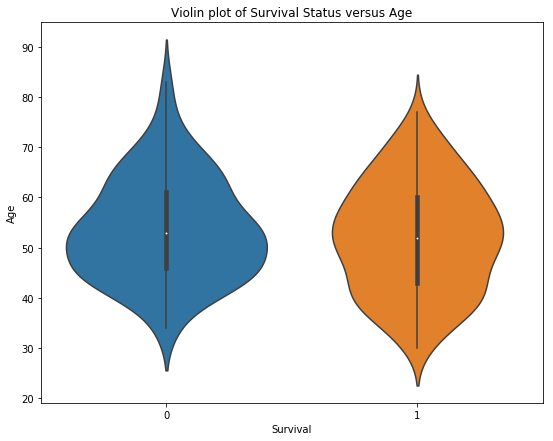

In [159]:
fig = plt.subplots(figsize =(9, 7)) 
sns.violinplot(x = df['Survival'], y = df['Age'] )
plt.title('Violin plot of Survival Status versus Age');

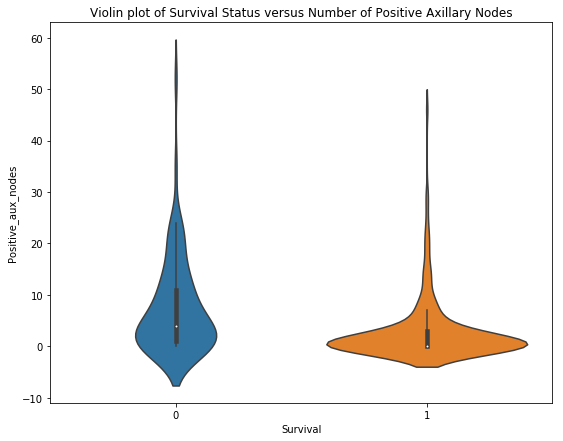

In [160]:
fig = plt.subplots(figsize =(9, 7)) 
sns.violinplot(x = df['Survival'], y = df['Positive_aux_nodes'] )
plt.title('Violin plot of Survival Status versus Number of Positive Axillary Nodes');

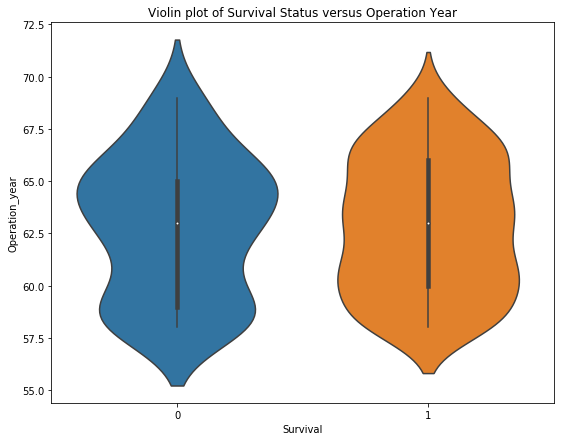

In [161]:
fig = plt.subplots(figsize =(9, 7)) 
sns.violinplot(x = df['Survival'], y = df['Operation_year'] )
plt.title('Violin plot of Survival Status versus Operation Year');

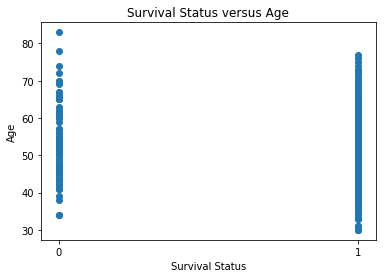

In [163]:
plt.scatter(df.Survival, df.Age);
plt.ylabel('Age')
plt.xlabel('Survival Status')
plt.xticks([0,1])
plt.title('Survival Status versus Age');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

### What is at least one feature that looks to have a positive relationship with survival?

   * Age
   
   This one is interesting. For people under 40, it seems that there is a high likelihood of surviving longer than 5 years. However, after 40, as the age at which you undergo the breast cancer operation increases, the likelihood of surviving past 5 years also increases. So, there is a bimodal distribution here, and not quite an entirely positive correlation between age and survival.

###What is at least one feature that looks to have a negative relationship with survival?

   * Number of positive axillary nodes 


###How are those two features related with each other, and what might that mean?

Note: please see the above table for number of positive nodes vs survival rate

As the number of positive axillary nodes increases, the probability of survival of that patient decreases. We see that patients with 0-10 positive nodes have the highest survival rate based on this dataset. 

This is fairly intuitive given the wikipedia definition of a positive axillary node as a lympy node in the armpit to which cancer has spread. It stands to reason that if you have a large number of these nodes to which cancer has spread your survival rate after an operation to remove them would be low. Potentially the doctor wouldn't be able to get all of them or something along those lines. 



Also, this last question is a little unclear. If you mean what is the relationship between age and number of axillary nodes, there doesn't appear to be one. You could posit that as the age at the time of operation gets larger the number of positive nodes increases, but the dataset does not show this relationship. 